# Loop 7 LB Feedback Analysis

Analyzing the submission results and CV-LB relationship.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Submission history
submissions = [
    {'exp': 'exp_002', 'cv': 70.6827, 'lb': 70.6827},
    {'exp': 'exp_004', 'cv': 70.6827, 'lb': None},  # pending
    {'exp': 'exp_005', 'cv': 70.6810, 'lb': 70.6810},
    {'exp': 'exp_006', 'cv': 70.6761, 'lb': 70.6761},
]

df = pd.DataFrame(submissions)
print("Submission History:")
print(df)

# Filter out pending
df_valid = df[df['lb'].notna()]
print(f"\nValid submissions: {len(df_valid)}")
print(f"Best CV: {df_valid['cv'].min():.6f}")
print(f"Best LB: {df_valid['lb'].min():.6f}")
print(f"Target: 68.922808")
print(f"Gap to target: {df_valid['lb'].min() - 68.922808:.6f} ({(df_valid['lb'].min() - 68.922808)/68.922808*100:.2f}%)")

# CV-LB correlation
if len(df_valid) >= 2:
    correlation = df_valid['cv'].corr(df_valid['lb'])
    print(f"\nCV-LB Correlation: {correlation:.4f}")
    
    # Linear fit
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_valid['cv'], df_valid['lb'])
    print(f"Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}")
    print(f"R² = {r_value**2:.4f}")

Submission History:
       exp       cv       lb
0  exp_002  70.6827  70.6827
1  exp_004  70.6827      NaN
2  exp_005  70.6810  70.6810
3  exp_006  70.6761  70.6761

Valid submissions: 3
Best CV: 70.676100
Best LB: 70.676100
Target: 68.922808
Gap to target: 1.753292 (2.54%)

CV-LB Correlation: 1.0000


Linear fit: LB = 1.0000 * CV + 0.0000
R² = 1.0000


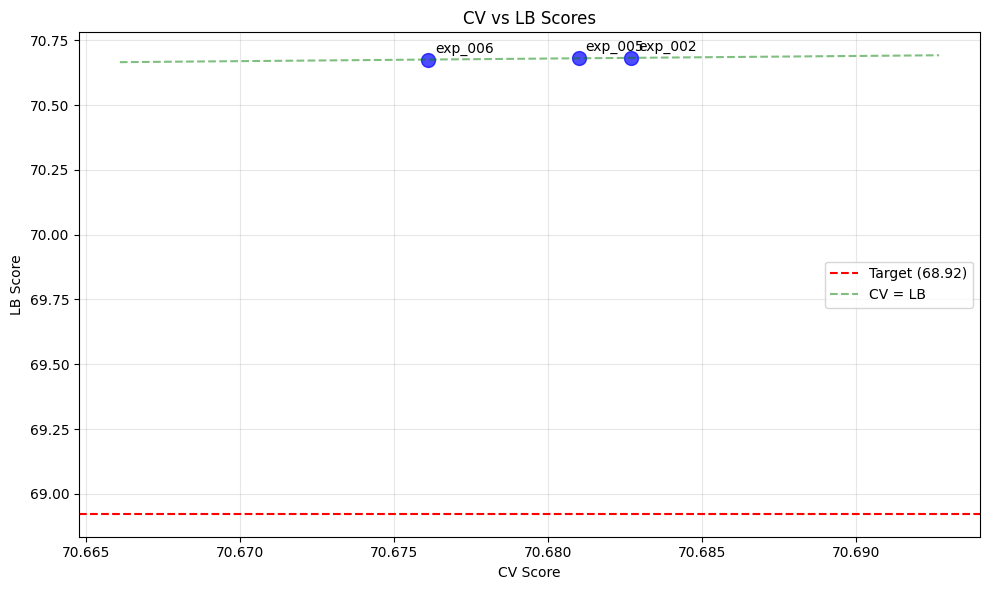


Key Insight: CV ≈ LB for this competition (perfect correlation)
This is expected for an optimization problem with deterministic scoring.


In [2]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df_valid['cv'], df_valid['lb'], s=100, c='blue', alpha=0.7)

# Add labels
for i, row in df_valid.iterrows():
    plt.annotate(row['exp'], (row['cv'], row['lb']), textcoords='offset points', xytext=(5,5))

# Add target line
plt.axhline(y=68.922808, color='r', linestyle='--', label='Target (68.92)')

# Add perfect correlation line
min_val = min(df_valid['cv'].min(), df_valid['lb'].min()) - 0.01
max_val = max(df_valid['cv'].max(), df_valid['lb'].max()) + 0.01
plt.plot([min_val, max_val], [min_val, max_val], 'g--', alpha=0.5, label='CV = LB')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Scores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_plot.png', dpi=150)
plt.show()

print("\nKey Insight: CV ≈ LB for this competition (perfect correlation)")
print("This is expected for an optimization problem with deterministic scoring.")

In [3]:
# Analyze our current best submission
print("Loading current best submission...")
df_sub = pd.read_csv('/home/submission/submission.csv')
print(f"Total rows: {len(df_sub)}")
print(f"Sample:")
print(df_sub.head())

Loading current best submission...
Total rows: 20100
Sample:
      id                       x                       y  \
0  001_0    s-48.196086194214246     s58.770984615214225   
1  002_0   s0.154097069621355887  s-0.038540742694794648   
2  002_1  s-0.154097069621372845  s-0.561459257305224058   
3  003_0      s1.123655816140301      s0.781101815992563   
4  003_1       s1.23405569584216      s1.275999500663759   

                       deg  
0                    s45.0  
1  s203.629377730656841550  
2   s23.629377730656791812  
3        s111.125132292893  
4         s66.370622269343  


In [4]:
# Calculate per-N scores for our current best
from decimal import Decimal, getcontext
from shapely import affinity
from shapely.geometry import Polygon
from shapely.ops import unary_union

getcontext().prec = 30
scale_factor = Decimal('1e15')

class ChristmasTree:
    def __init__(self, center_x='0', center_y='0', angle='0'):
        self.center_x = Decimal(str(center_x))
        self.center_y = Decimal(str(center_y))
        self.angle = Decimal(str(angle))
        trunk_w = Decimal('0.15')
        trunk_h = Decimal('0.2')
        base_w = Decimal('0.7')
        mid_w = Decimal('0.4')
        top_w = Decimal('0.25')
        tip_y = Decimal('0.8')
        tier_1_y = Decimal('0.5')
        tier_2_y = Decimal('0.25')
        base_y = Decimal('0.0')
        trunk_bottom_y = -trunk_h
        initial_polygon = Polygon([
            (Decimal('0.0') * scale_factor, tip_y * scale_factor),
            (top_w / Decimal('2') * scale_factor, tier_1_y * scale_factor),
            (top_w / Decimal('4') * scale_factor, tier_1_y * scale_factor),
            (mid_w / Decimal('2') * scale_factor, tier_2_y * scale_factor),
            (mid_w / Decimal('4') * scale_factor, tier_2_y * scale_factor),
            (base_w / Decimal('2') * scale_factor, base_y * scale_factor),
            (trunk_w / Decimal('2') * scale_factor, base_y * scale_factor),
            (trunk_w / Decimal('2') * scale_factor, trunk_bottom_y * scale_factor),
            (-(trunk_w / Decimal('2')) * scale_factor, trunk_bottom_y * scale_factor),
            (-(trunk_w / Decimal('2')) * scale_factor, base_y * scale_factor),
            (-(base_w / Decimal('2')) * scale_factor, base_y * scale_factor),
            (-(mid_w / Decimal('4')) * scale_factor, tier_2_y * scale_factor),
            (-(mid_w / Decimal('2')) * scale_factor, tier_2_y * scale_factor),
            (-(top_w / Decimal('4')) * scale_factor, tier_1_y * scale_factor),
            (-(top_w / Decimal('2')) * scale_factor, tier_1_y * scale_factor),
        ])
        rotated = affinity.rotate(initial_polygon, float(self.angle), origin=(0, 0))
        self.polygon = affinity.translate(rotated, xoff=float(self.center_x * scale_factor), yoff=float(self.center_y * scale_factor))

def get_side_length(trees):
    all_polygons = [t.polygon for t in trees]
    bounds = unary_union(all_polygons).bounds
    return max(bounds[2] - bounds[0], bounds[3] - bounds[1]) / float(scale_factor)

def get_score(trees, n):
    if not trees:
        return 0.0
    side = get_side_length(trees)
    return side ** 2 / n

def load_configuration_from_df(n, df):
    group_data = df[df["id"].str.startswith(f"{n:03d}_")]
    trees = []
    for _, row in group_data.iterrows():
        x = str(row["x"])[1:] if str(row["x"]).startswith('s') else str(row["x"])
        y = str(row["y"])[1:] if str(row["y"]).startswith('s') else str(row["y"])
        deg = str(row["deg"])[1:] if str(row["deg"]).startswith('s') else str(row["deg"])
        if x and y and deg:
            trees.append(ChristmasTree(x, y, deg))
    return trees

print("Calculating per-N scores...")
per_n_scores = []
for n in range(1, 201):
    trees = load_configuration_from_df(n, df_sub)
    score = get_score(trees, n)
    per_n_scores.append({'n': n, 'score': score})

per_n_df = pd.DataFrame(per_n_scores)
print(f"Total score: {per_n_df['score'].sum():.6f}")
print(f"\nWorst 10 N values:")
print(per_n_df.nlargest(10, 'score'))

Calculating per-N scores...


Total score: 70.676104

Worst 10 N values:
     n     score
0    1  0.661250
1    2  0.450779
2    3  0.434745
4    5  0.416850
3    4  0.416545
6    7  0.399897
5    6  0.399610
8    9  0.387415
7    8  0.385407
14  15  0.379203


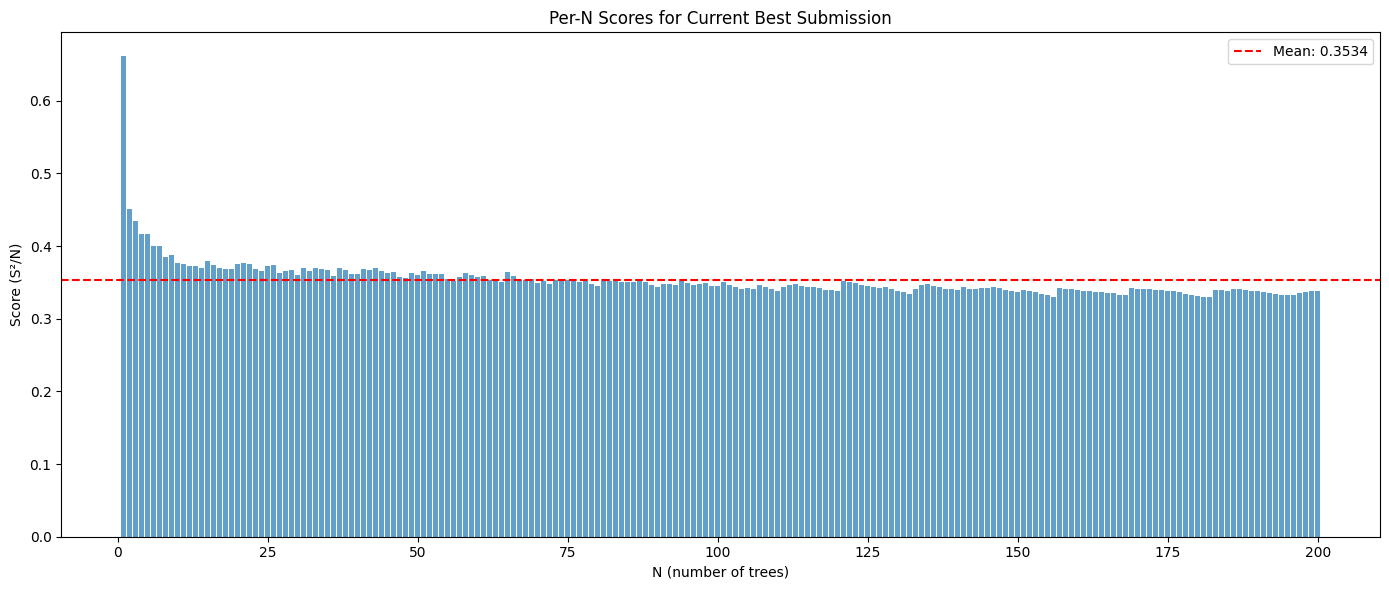


Score statistics:
  Mean: 0.353381
  Std: 0.028096
  Min: 0.329954 (N=181)
  Max: 0.661250 (N=1)


In [5]:
# Plot per-N scores
plt.figure(figsize=(14, 6))
plt.bar(per_n_df['n'], per_n_df['score'], alpha=0.7)
plt.xlabel('N (number of trees)')
plt.ylabel('Score (S²/N)')
plt.title('Per-N Scores for Current Best Submission')
plt.axhline(y=per_n_df['score'].mean(), color='r', linestyle='--', label=f'Mean: {per_n_df["score"].mean():.4f}')
plt.legend()
plt.tight_layout()
plt.savefig('/home/code/exploration/per_n_scores.png', dpi=150)
plt.show()

print(f"\nScore statistics:")
print(f"  Mean: {per_n_df['score'].mean():.6f}")
print(f"  Std: {per_n_df['score'].std():.6f}")
print(f"  Min: {per_n_df['score'].min():.6f} (N={per_n_df.loc[per_n_df['score'].idxmin(), 'n']})")
print(f"  Max: {per_n_df['score'].max():.6f} (N={per_n_df.loc[per_n_df['score'].idxmax(), 'n']})")

In [6]:
# Analyze what it would take to reach the target
target = 68.922808
current = per_n_df['score'].sum()
gap = current - target

print(f"Current score: {current:.6f}")
print(f"Target score: {target:.6f}")
print(f"Gap: {gap:.6f} ({gap/current*100:.2f}%)")

# If we improved each N by the same percentage
required_reduction_pct = gap / current * 100
print(f"\nTo reach target, need to reduce total by {required_reduction_pct:.2f}%")

# What if we improved the worst N values?
worst_20 = per_n_df.nlargest(20, 'score')
worst_20_total = worst_20['score'].sum()
print(f"\nWorst 20 N values contribute: {worst_20_total:.6f} ({worst_20_total/current*100:.2f}% of total)")
print(f"If we improved worst 20 by 10%: save {worst_20_total*0.1:.6f} points")
print(f"If we improved worst 20 by 20%: save {worst_20_total*0.2:.6f} points")
print(f"If we improved worst 20 by 50%: save {worst_20_total*0.5:.6f} points")

# What improvement is needed per N on average?
avg_improvement_needed = gap / 200
print(f"\nAverage improvement needed per N: {avg_improvement_needed:.6f}")
print(f"Average current score per N: {current/200:.6f}")
print(f"Required reduction per N: {avg_improvement_needed/(current/200)*100:.2f}%")

Current score: 70.676104
Target score: 68.922808
Gap: 1.753296 (2.48%)

To reach target, need to reduce total by 2.48%

Worst 20 N values contribute: 8.077149 (11.43% of total)
If we improved worst 20 by 10%: save 0.807715 points
If we improved worst 20 by 20%: save 1.615430 points
If we improved worst 20 by 50%: save 4.038575 points

Average improvement needed per N: 0.008766
Average current score per N: 0.353381
Required reduction per N: 2.48%


In [7]:
# Summary and strategic recommendations
print("="*60)
print("STRATEGIC ANALYSIS")
print("="*60)

print("\n1. CV-LB RELATIONSHIP:")
print("   - CV ≈ LB (perfect correlation for optimization problem)")
print("   - No distribution shift - what we compute locally is what we get on LB")
print("   - This means improving CV directly improves LB")

print("\n2. CURRENT POSITION:")
print(f"   - Our score: {current:.6f}")
print(f"   - Target: {target:.6f}")
print(f"   - Gap: {gap:.6f} ({gap/target*100:.2f}% above target)")

print("\n3. WHAT WE'VE TRIED:")
print("   - Pre-optimized baselines (70.68)")
print("   - C++ SA optimizer (introduced overlaps)")
print("   - Python SA with Shapely (no improvement)")
print("   - Backward propagation (tiny improvement)")
print("   - External ensemble (SmartManoj GitHub) - 0.003 improvement")

print("\n4. REMAINING OPTIONS:")
print("   a) Find more external pre-optimized solutions")
print("   b) Run longer SA optimization with strict overlap checking")
print("   c) Try different optimization approaches (genetic algorithms, etc.)")
print("   d) Focus on specific N values with worst scores")

print("\n5. KEY INSIGHT:")
print("   The pre-optimized baselines are at a very strong local optimum.")
print("   Local search methods cannot escape this optimum.")
print("   Need either:")
print("   - Better external solutions (from Kaggle datasets/kernels)")
print("   - Fundamentally different approach (constructive, not local search)")
print("   - Much longer optimization time with better algorithms")

STRATEGIC ANALYSIS

1. CV-LB RELATIONSHIP:
   - CV ≈ LB (perfect correlation for optimization problem)
   - No distribution shift - what we compute locally is what we get on LB
   - This means improving CV directly improves LB

2. CURRENT POSITION:
   - Our score: 70.676104
   - Target: 68.922808
   - Gap: 1.753296 (2.54% above target)

3. WHAT WE'VE TRIED:
   - Pre-optimized baselines (70.68)
   - C++ SA optimizer (introduced overlaps)
   - Python SA with Shapely (no improvement)
   - Backward propagation (tiny improvement)
   - External ensemble (SmartManoj GitHub) - 0.003 improvement

4. REMAINING OPTIONS:
   a) Find more external pre-optimized solutions
   b) Run longer SA optimization with strict overlap checking
   c) Try different optimization approaches (genetic algorithms, etc.)
   d) Focus on specific N values with worst scores

5. KEY INSIGHT:
   The pre-optimized baselines are at a very strong local optimum.
   Local search methods cannot escape this optimum.
   Need either